In [7]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
data = pd.read_pickle("ddata.pickle")
data2 = pd.read_pickle("ryu_new_price9.pickle")
#pd.pivot_table(data=data["prc"],
#               index=data.index, 
#               columns=data["permno"],
#               )

In [3]:
sample = data[["permno","prc"]]
sample

,permno,prc
date,,
2013-05-06,BTCUSDT,112.300011
2013-05-06,LTCUSDT,3.371246
2013-05-07,BTCUSDT,111.500000
2013-05-07,LTCUSDT,3.332735
2013-05-08,BTCUSDT,113.565559
...,...,...
2023-02-23,YFIUSDT,9477.934167
2023-02-23,ZECUSDT,47.893878
2023-02-23,ZENUSDT,13.345326


In [4]:
table = pd.pivot_table(data=sample,
                       values=["prc"], 
                       index=sample.index,
                       columns=["permno"])

In [6]:
btc = table[("prc","BTCUSDT")]#.pct_change()

#btc.corr(btc.shift(1))

date
2013-05-06      112.300011
2013-05-07      111.500000
2013-05-08      113.565559
2013-05-09      112.669998
2013-05-10      117.199997
                  ...     
2023-02-19    24327.641672
2023-02-20    24829.147570
2023-02-21    24436.354485
2023-02-22    24188.842977
2023-02-23    23947.492523
Name: (prc, BTCUSDT), Length: 3581, dtype: float64

In [13]:
btc2 = data2[["BTC"]]

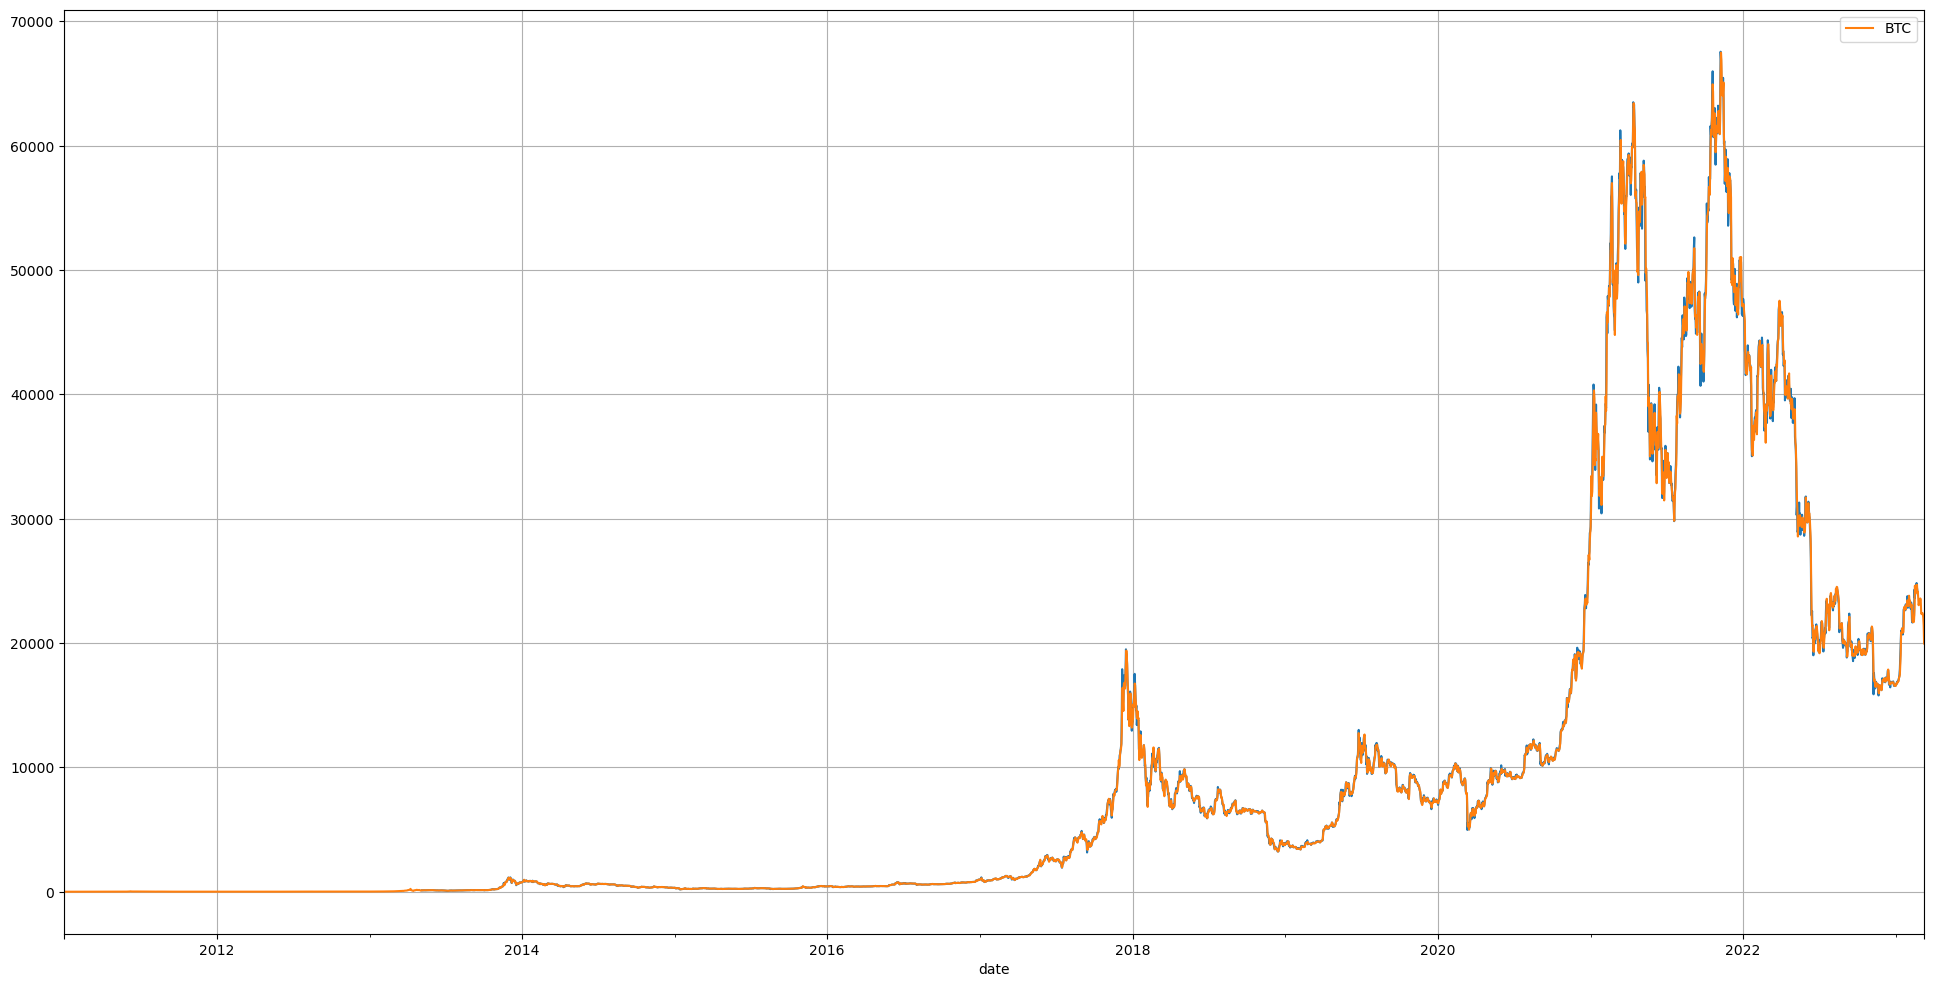

In [14]:
fig, axes = plt.subplots(1,1)

table[("prc","BTCUSDT")].plot(figsize=(24,12), ax=axes)
btc2.plot(figsize=(24,12), ax=axes)
plt.grid();

In [20]:
start = btc.index[0]

In [47]:
btc_pct = btc.pct_change()
btc2_pct = btc2.loc[start:"2023-02-23"].pct_change()

In [75]:
valu2 = btc2_pct.values.flatten()

In [79]:
btc_pct2 = pd.Series(valu2, index=btc2_pct.index)

In [65]:
btc_pct.name = "btc"
btc_pct

date
2013-05-06         NaN
2013-05-07   -0.007124
2013-05-08    0.018525
2013-05-09   -0.007886
2013-05-10    0.040206
                ...   
2023-02-19   -0.012728
2023-02-20    0.020615
2023-02-21   -0.015820
2023-02-22   -0.010129
2023-02-23   -0.009978
Name: btc, Length: 3581, dtype: float64

In [85]:
pd.concat([btc_pct,btc2_pct],axis=1)

,btc,BTC
2013-05-06,NaN,NaN
2013-05-07,-0.007124,-0.092683
2013-05-08,0.018525,0.046162
2013-05-09,-0.007886,-0.008772
2013-05-10,0.040206,0.041030
...,...,...
2023-02-19,-0.012728,0.001219
2023-02-20,0.020615,0.000690
2023-02-21,-0.015820,0.001501
2023-02-22,-0.010129,-0.027495


In [86]:
crypto_compare = pd.read_csv("all_coin_closeprice.csv",
                             index_col=0,parse_dates=True)

# 교수님 방식으로 저장하고

In [111]:
crypto_compare.shape

(4749, 3264)

In [93]:
pct_3 = crypto_compare[["BTC"]].loc["2013-05-06":"2023-02-23"].pct_change()
pct_3.columns = ["b"]

In [103]:
a = pd.Series(pct_3.values.flatten(),
          index=pct_3.index)

In [105]:
a

2013-05-06         NaN
2013-05-07   -0.023608
2013-05-08    0.032847
2013-05-09   -0.003534
2013-05-10    0.043440
                ...   
2022-12-26    0.005168
2022-12-27   -0.012741
2022-12-28   -0.009585
2022-12-29    0.005488
2022-12-30   -0.001910
Length: 3527, dtype: float64

In [106]:
btc_pct

date
2013-05-06         NaN
2013-05-07   -0.007124
2013-05-08    0.018525
2013-05-09   -0.007886
2013-05-10    0.040206
                ...   
2023-02-19   -0.012728
2023-02-20    0.020615
2023-02-21   -0.015820
2023-02-22   -0.010129
2023-02-23   -0.009978
Name: btc, Length: 3581, dtype: float64

In [110]:
a.corr(a.shift(1))

-0.02673930885007491

In [108]:
pd.concat([btc_pct.loc[:"2022-12-30"],btc2_pct.loc[:"2022-12-30"], a],axis=1).corr()

,btc,BTC,0
btc,1.000000,0.591873,0.589520
BTC,0.591873,1.000000,0.393318
0,0.589520,0.393318,1.000000


In [48]:
btc_pct.corr(btc_pct.shift(1))

-0.021035979057757268

In [51]:
btc_pct

date
2013-05-06         NaN
2013-05-07   -0.007124
2013-05-08    0.018525
2013-05-09   -0.007886
2013-05-10    0.040206
                ...   
2023-02-19   -0.012728
2023-02-20    0.020615
2023-02-21   -0.015820
2023-02-22   -0.010129
2023-02-23   -0.009978
Name: (prc, BTCUSDT), Length: 3581, dtype: float64

In [59]:
btc2_pct.values

array([[        nan],
       [-0.09268293],
       [ 0.0461624 ],
       ...,
       [ 0.00150053],
       [-0.02749544],
       [ 0.00462192]])

In [57]:
pd.Series(btc2_pct.values, index=btc2_pct.index)

ValueError: Data must be 1-dimensional, got ndarray of shape (3581, 1) instead

In [43]:
btc2_pct.corr(btc2_pct.shift(1))

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [34]:
pd.concat([btc2.loc[start:"2023-02-23"], btc], axis=1).corr()

,BTC,"(prc, BTCUSDT)"
BTC,1.000000,0.999607
"(prc, BTCUSDT)",0.999607,1.000000
